## 3.5 word2vec 보충
- CBOW 모델을 '확률'관점에서 다시 살펴보기

#### 3.5.1 CBOW 모델과 확률
- P(A): A가 일어날 확률
- P(A, B): A와 B가 동시에 일어날 확률
- P(A|B) : B라는 정보가 주어졌을 떄 A가 일너날 확률
- CBOW 모델이 하는 일은 맥락을 주면 타깃 단어가 출현할 확률을 출력하는 것이다.

![image](https://github.com/choibigo/Study/assets/38881179/9359eaa4-5538-44b2-9b55-11b846ae7308)

- P(Wt | Wt-1, Wt+1): Wt-1과 Wt+1이 주어졌을 때 타깃이 Wt가 될 확률
- CBOW는 위 식을 모델링 하고 있는 것이다.

![image](https://github.com/choibigo/Study/assets/38881179/bd2e2513-f53e-4828-8cac-b5e2fab34311)

- y^은 예측한 값으로 y가 발생한 확률이다, y는 정답 값으로 발생했을 때는 1 아닐 때는 0 이다.

![image](https://github.com/choibigo/Study/assets/38881179/9382aa30-b898-4fb4-aadd-d2121c5ef17a)

- wt는 원핫벡터로 Wt에 대한 원소만 1이고 나머지는 0이 된다 따라서 곱해지는 값 없이 위와 같은 식이 얻어진다.
- loss는 줄어야 하는 값이므로 - 를 붙인다, 이를 negative log likelihood라고 한다.
- 위 식은 데이터 하나에 대한 손실함수이며, 여러 샘플 데이터에 대해 확장 시킬 수 있다.

![image](https://github.com/choibigo/Study/assets/38881179/734b3a7c-572e-41bc-9ce6-98ede716df1e)

- CBOW 모델의 학습이 수행하는 일은 이 손실 함수의 값을 가능한 작게 만드는 것이다.
- 이때 입력 매개 변수 (Weight)가 얻고자 하는 단어의 분산 표현이다.

#### 3.5.2 skip-gram 모델
- skip-gram 모델은 CBOW에서 다루는 맥락과 타겟을 역전시킨 모델이다.

![image](https://github.com/choibigo/Study/assets/38881179/7841ae58-ce2d-4a64-895e-4a6cea1e219b)

- skip-gram은 타겟이 주어져 있고 주변의 단어(맥락)을 추측한다.

![image](https://github.com/choibigo/Study/assets/38881179/74525ad7-cb0f-417d-972f-b3374b02dff2)

- skip-gram 모델의 입력층은 타겟 하나 이다.
- 한편 출력층은 맥락의 수 (window size)만큼 존재 한다.
- 각 출력층에서 softmax 를 이용해 개별적으로 손실과 score를 구한다.

![image](https://github.com/choibigo/Study/assets/38881179/420eade7-7b74-4770-a3ba-5bd59c087808)

- skip-gram을 확률로 나타내면 위와 같다.
- wt(타겟)이 주어 졌을때 wt-1, wt+1 (맥락)이 일어날 확률 이다.
- 맥락과 맥락 사이에는 관련이 없다고 판단(독립)하여 확률을 분해한다.

![image](https://github.com/choibigo/Study/assets/38881179/6ae46f3c-3c0e-4bce-9f2b-dee7bc234fe3)

- 이를 cross-entropy에 적용하여 skip-gram 모델의 손실함수를 구할 수 있다.

![image](https://github.com/choibigo/Study/assets/38881179/cff26992-1fff-4c78-abcf-f0cb3915f488)

- 로그의 성질로 인해서 곱을 합으로 표현 했다.
- 또한 샘플 여러개에 대해서 고려할 수 있다.

![image](https://github.com/choibigo/Study/assets/38881179/25ca7261-10f4-4ea9-9864-2b3717106cda)

- CBOW 모델과 차이는 확률을 구하는 개수이다.
- skip-gram 모델은 맥락의 수만큼 추측하기 때문에 그 손실 함수는 각 맥락에서 구한 손실의 총합이여야 한다.
- 반면에 CBOW 모델은 타겟 하나의 손실함수를 구한다.
- skip-gram과 CBOW를 비교 했을떄 skip-gram이 더 좋은 모델이라고 할 수 있다.
- 단어 분산 표현의 정밀도 면에서 skip-gram 모델의 결과가 더 좋은 경우가 많기 때문이다.
- 특히 말뭉치가 커질수록 저빈도 단어나 유추 문제의 성능 면에서 skip-gram 모델이 더 뛰어난 경향이 있다.
- 학습 속도 측면에서는 CBOW의 loss 연산량이 더 적기 때문에 더 빠르다.

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 4.15
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 4.15
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 4.15
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 4.15
| 에폭 26 |

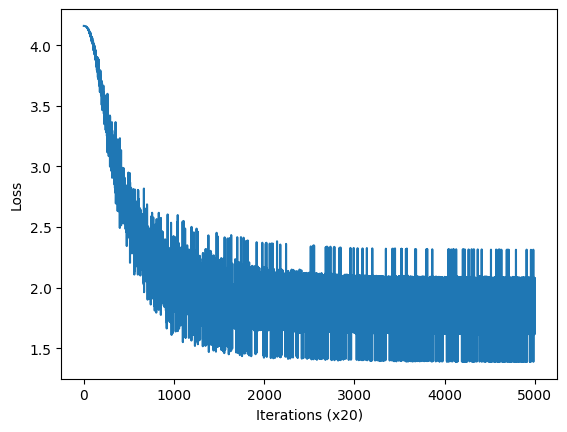

you [0.01541078 0.0133069 ]
say [-0.75248283 -2.1346714 ]
goodbye [2.0477014 2.6895468]
and [-3.7874184 -1.0168189]
i [2.044873  2.6856768]
hello [-1.8774927  2.9755542]
 [ 3.2043302 -2.9932995]
. [-0.01861797  0.00113086]


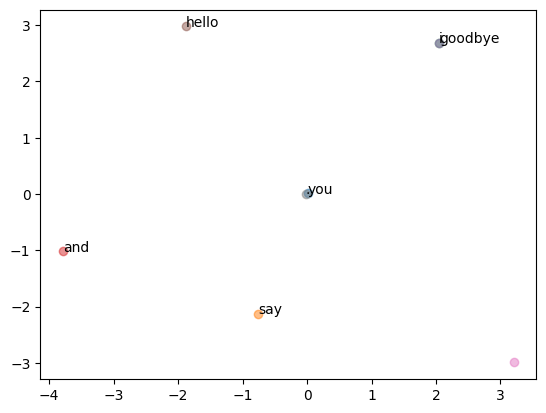

In [2]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss
from common.trainer import Trainer
from common.optimizer import Adam
from common.utill import preprocess, create_contexts_target, convert_one_hot
import matplotlib.pyplot as plt

class SimpleSkipGram:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size
        
        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')
        
        self.word_vecs = W_in

        # 레이어 생성
        self.in_layer = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()
        
        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
            
        # 인스턴스 변수에 단어의 분산표현을 저장한다.
        self.word_vecs1 = W_in
        self.word_vecs2 = W_out.T
        
        
    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer1.forward(s, contexts[:, 0])
        l2 = self.loss_layer2.forward(s, contexts[:, 1])
        loss = l1 + l2
        return loss
    
    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None

    
window_size = 1
hidden_size = 2
batch_size = 3
max_epoch = 5000

text = 'You say goodbye and i say hello .'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size) # target과 target에 대한 맥락 생성
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs 
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])
    plt.annotate(word, (word_vecs[word_id][0], word_vecs[word_id][1]))
    plt.scatter(word_vecs[word_id][0], word_vecs[word_id][1], alpha=0.5)
plt.show()


